In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CVS File
covidcase = pd.read_csv('Resources/covidcase.csv')
covidcase.head()

,outcome,month,mmwr_week,age_group,vaccination_status,vaccinated_with_outcome,vaccinated_population,unvaccinated_with_outcome,unvaccinated_population,crude_vax_ir,crude_unvax_ir,crude_irr,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr,monthly_age_adj_vax_ir,monthly_age_adj_unvax_ir,monthly_age_adj_irr,monthly_age_adj_mb_irr,continuity_correction
0,case,21-Oct,202140,17-Dec,vaccinated,"2,415","5,215,933","22,347","5,662,491",46.30044136,394.6496339,8.523669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,case,21-Oct,202140,17-Dec,vax with updated booster,NaN,NaN,"22,347","5,662,491",NaN,394.6496339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,case,21-Oct,202140,18-29,vaccinated,"9,702","12,993,943","37,134","10,635,534",74.66555764,349.1503106,4.676190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,case,21-Oct,202140,18-29,vax with updated booster,NaN,NaN,"37,134","10,635,534",NaN,349.1503106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,case,21-Oct,202140,30-49,vaccinated,"25,417","24,904,526","56,640","12,585,691",102.0577545,450.0348849,4.409610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Delete useless columns
covidcase.drop(columns=['vaccinated_with_outcome','vaccinated_population','unvaccinated_with_outcome',
                        'unvaccinated_population','crude_vax_ir','crude_unvax_ir','vaccination_status','crude_irr',
                        'age_adj_vax_ir','age_adj_unvax_ir','age_adj_irr','continuity_correction','age_group',
                        'monthly_age_adj_irr','monthly_age_adj_mb_irr','mmwr_week'], inplace=True)

# Rename Columns
covidcase = covidcase.rename(columns={"monthly_age_adj_vax_ir":"Monthly vaccinated 18+ outcome(per 100,000 population)", "monthly_age_adj_unvax_ir":
                                     "Monthly unvaccinated 18+ outcome(per 100,000 population)",})
covidcase.dropna(inplace=True)

covidcase.head()

,outcome,month,"Monthly vaccinated 18+ outcome(per 100,000 population)","Monthly unvaccinated 18+ outcome(per 100,000 population)"
12,case,21-Oct,80.35425,378.77594
26,case,21-Oct,80.35425,378.77594
40,case,21-Oct,80.35425,378.77594
54,case,21-Oct,80.35425,378.77594
68,case,21-Nov,93.44667,388.95412


In [13]:
# Remove Duplicates Rows
covidcase = covidcase.drop_duplicates(subset='month')
covidcase.head(50)

,outcome,month,"Monthly vaccinated 18+ outcome(per 100,000 population)","Monthly unvaccinated 18+ outcome(per 100,000 population)"
12,case,21-Oct,80.35425,378.77594
68,case,21-Nov,93.44667,388.95412
124,case,21-Dec,415.19849,1143.45000
204,case,22-Jan,935.25039,2631.91000
268,case,22-Feb,153.12196,503.24091
332,case,22-Mar,38.73891,90.90319
412,case,22-Apr,89.02147,149.66174
476,case,22-May,171.95994,314.10930
540,case,22-Jun,170.21979,404.19350
620,case,22-Jul,195.24852,558.70293


<IPython.core.display.Javascript object>


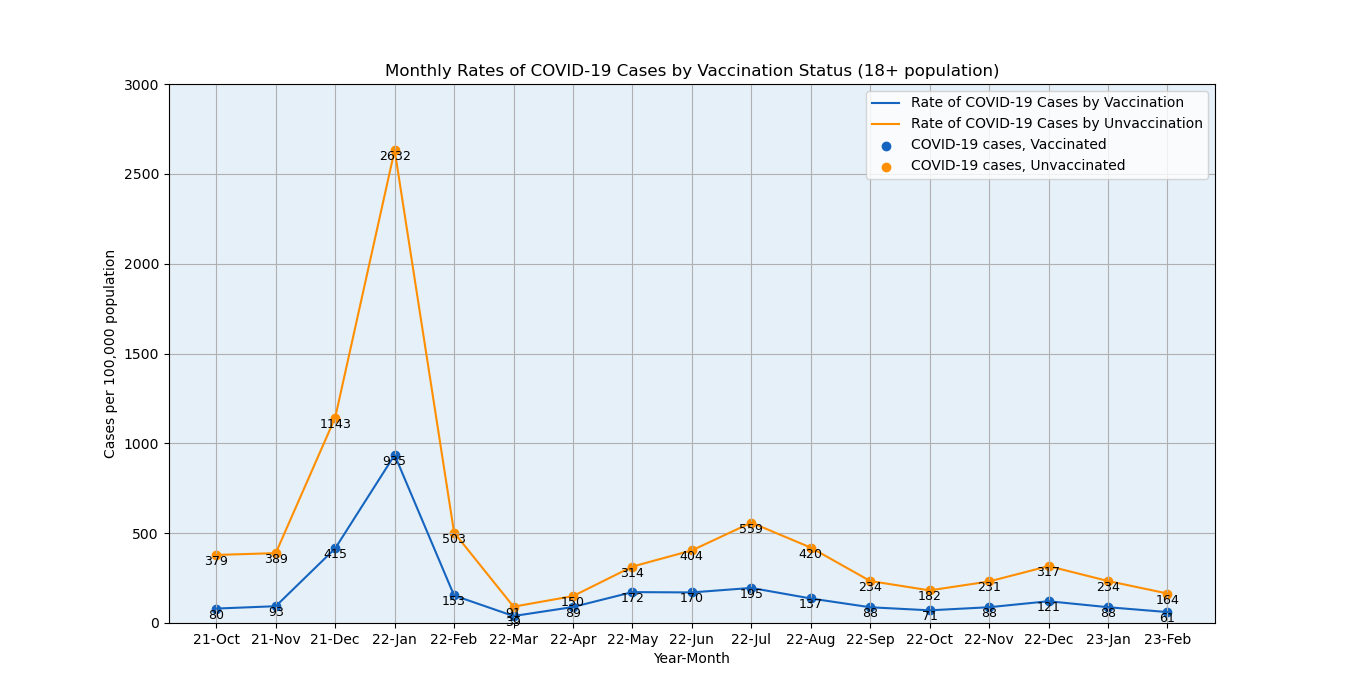

In [6]:
# Create the line chart
ax = covidcase.plot(x='month', y="Monthly vaccinated 18+ outcome(per 100,000 population)",
                    figsize=(13.5, 7), color='#1565C0', label='Rate of COVID-19 Cases by Vaccination')
covidcase.plot(x='month', y="Monthly unvaccinated 18+ outcome(per 100,000 population)",
               figsize=(13.5, 7), color='#FF8F00', label='Rate of COVID-19 Cases by Unvaccination', ax=ax)


# Add dots to the lines
ax.scatter(covidcase['month'], covidcase["Monthly vaccinated 18+ outcome(per 100,000 population)"], color='#1565C0', label='COVID-19 cases, Vaccinated')
ax.scatter(covidcase['month'], covidcase["Monthly unvaccinated 18+ outcome(per 100,000 population)"], color='#FF8F00', label='COVID-19 cases, Unvaccinated')

# Set labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Cases per 100,000 population')
ax.set_title('Monthly Rates of COVID-19 Cases by Vaccination Status (18+ population)')

# Set the maximum y-axis value
ax.set_ylim(0, 3000)
ax.set_xticks(covidcase['month'])
ax.set_xticklabels(covidcase['month'])

# Annotate the data points
vaccinated_outcomes = covidcase["Monthly vaccinated 18+ outcome(per 100,000 population)"]
unvaccinated_outcomes = covidcase["Monthly unvaccinated 18+ outcome(per 100,000 population)"]
for idx in covidcase.index:
    month = covidcase.loc[idx, 'month']
    ax.annotate(f'{vaccinated_outcomes[idx]:.0f}', (month, vaccinated_outcomes[idx]), ha='center', va='top', fontsize=9, color='black')
    ax.annotate(f'{unvaccinated_outcomes[idx]:.0f}', (month, unvaccinated_outcomes[idx]), ha='center', va='top', fontsize=9, color='black')

# Add a legend
ax.legend()
plt.grid(True)
# Change the background color
ax.set_facecolor('#E6F0F8')
# Save the image before displaying it
plt.savefig('rates_of_covid19_cases_by_vaccination_status.png', bbox_inches='tight', dpi=300)




<IPython.core.display.Javascript object>


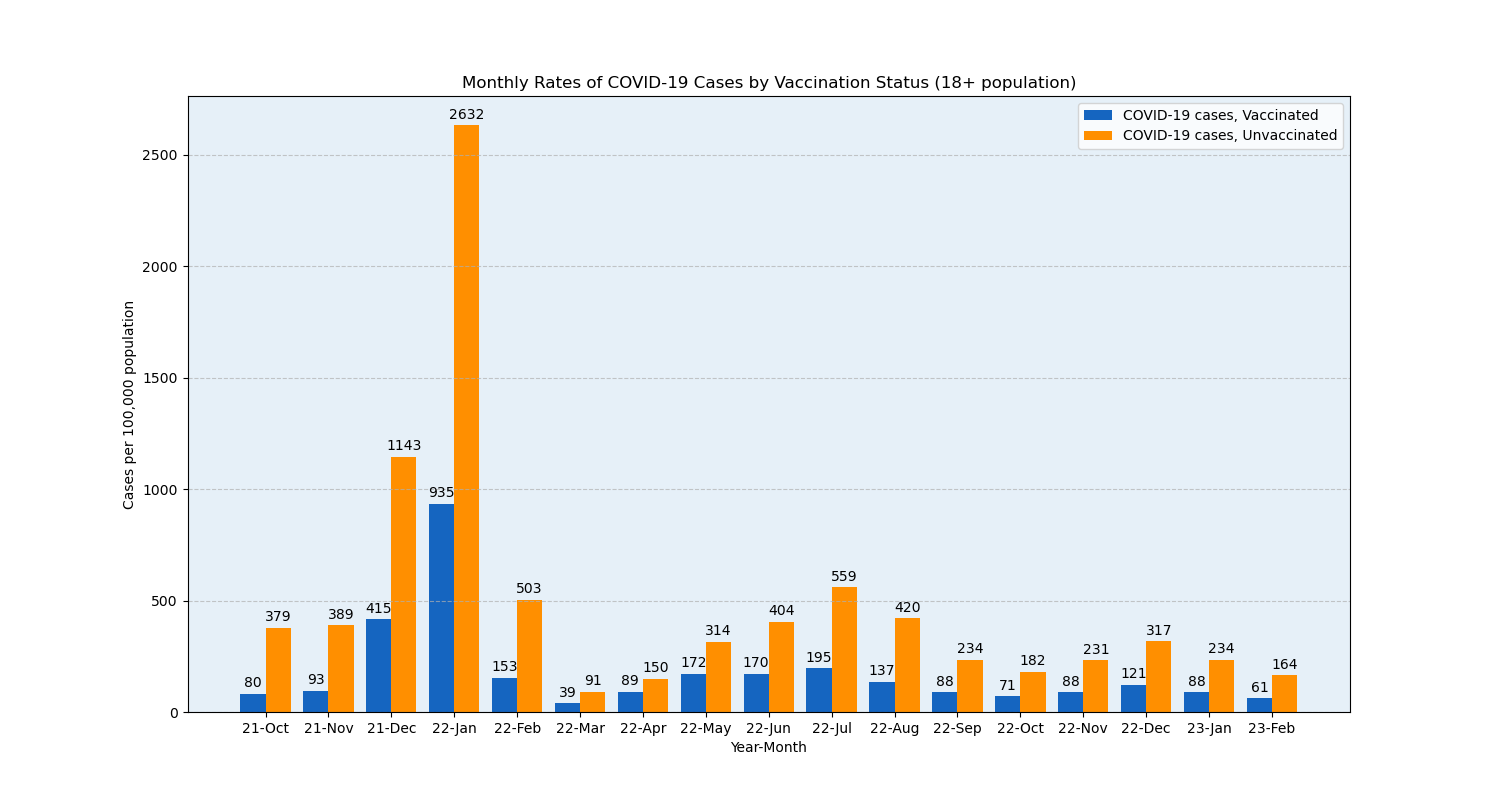

In [7]:

# Create the bar chart
plt.figure(figsize=(15, 8))
width = 0.4
x = np.arange(len(covidcase['month']))
plt.bar(x - width/2, covidcase['Monthly vaccinated 18+ outcome(per 100,000 population)'], width, label='COVID-19 cases, Vaccinated', color='#1565C0')
plt.bar(x + width/2, covidcase['Monthly unvaccinated 18+ outcome(per 100,000 population)'], width, label='COVID-19 cases, Unvaccinated', color='#FF8F00')

# Customize the chart
plt.xlabel('Year-Month')
plt.ylabel('Cases per 100,000 population')
plt.title('Monthly Rates of COVID-19 Cases by Vaccination Status (18+ population)')
plt.xticks(x, covidcase['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i, v in enumerate(covidcase['Monthly vaccinated 18+ outcome(per 100,000 population)']):
    plt.text(i - width/2, v + 30, f'{v:.0f}', ha='center', fontsize=10, color='black')

for i, v in enumerate(covidcase['Monthly unvaccinated 18+ outcome(per 100,000 population)']):
    plt.text(i + width/2, v + 30, f'{v:.0f}', ha='center', fontsize=10, color='black')

# Add a legend
plt.legend()

# Set the background color
plt.gca().set_facecolor('#E6F0F8')

# Save the image before displaying it
plt.savefig('cases_bar_chart.png', bbox_inches='tight', dpi=300)

# Display the chart
plt.show()


In [8]:
#Read CSV File
covid_death = pd.read_csv('Resources/coviddeath.csv')
covid_death.head()

,outcome,month,mmwr_week,age_group,vaccination_status,vaccinated_with_outcome,vaccinated_population,unvaccinated_with_outcome,unvaccinated_population,crude_vax_ir,crude_unvax_ir,crude_irr,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr,monthly_age_adj_vax_ir,monthly_age_adj_unvax_ir,monthly_age_adj_irr,monthly_age_adj_mb_irr,continuity_correction
0,death,21-Oct,202140,17-Dec,vaccinated,0,"4,550,524",4,"5,113,442",0.000000,0.078225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,death,21-Oct,202140,17-Dec,vax with updated booster,NaN,NaN,4,"5,113,442",NaN,0.078225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,death,21-Oct,202140,18-29,vaccinated,0,"11,016,038",27,"9,721,147",0.000000,0.277745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,death,21-Oct,202140,18-29,vax with updated booster,NaN,NaN,27,"9,721,147",NaN,0.277745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,death,21-Oct,202140,30-49,vaccinated,17,"21,347,745",319,"11,552,795",0.079634,2.761237,34.67422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
# Delete useless columns
covid_death.drop(columns=['vaccinated_with_outcome','vaccinated_population','unvaccinated_with_outcome',
                        'unvaccinated_population','crude_vax_ir','crude_unvax_ir','vaccination_status','crude_irr',
                        'age_adj_vax_ir','age_adj_unvax_ir','age_adj_irr','continuity_correction','age_group',
                        'monthly_age_adj_irr','monthly_age_adj_mb_irr','mmwr_week'], inplace=True)
# Rename Columns
covid_death = covid_death.rename(columns={"monthly_age_adj_vax_ir":"Monthly vaccinated 18+ outcome(per 100,000 population)", "monthly_age_adj_unvax_ir":
                                     "Monthly unvaccinated 18+ outcome(per 100,000 population)",})
covid_death.dropna(inplace=True)

covid_death.head()


,outcome,month,"Monthly vaccinated 18+ outcome(per 100,000 population)","Monthly unvaccinated 18+ outcome(per 100,000 population)"
12,death,21-Oct,0.67304,10.63058
26,death,21-Oct,0.67304,10.63058
40,death,21-Oct,0.67304,10.63058
54,death,21-Oct,0.67304,10.63058
68,death,21-Nov,0.67032,10.28212


In [10]:
# Remove Duplicates Rows
covid_death = covid_death.drop_duplicates(subset='month')
covid_death.head(50)

,outcome,month,"Monthly vaccinated 18+ outcome(per 100,000 population)","Monthly unvaccinated 18+ outcome(per 100,000 population)"
12,death,21-Oct,0.67304,10.63058
68,death,21-Nov,0.67032,10.28212
124,death,21-Dec,1.09812,17.35892
204,death,22-Jan,3.05920,30.59508
268,death,22-Feb,1.09874,13.33732
332,death,22-Mar,0.24041,2.63842
412,death,22-Apr,0.19436,1.08356
476,death,22-May,0.37016,1.70779
540,death,22-Jun,0.52749,2.45775
620,death,22-Jul,0.70836,3.45212


<IPython.core.display.Javascript object>


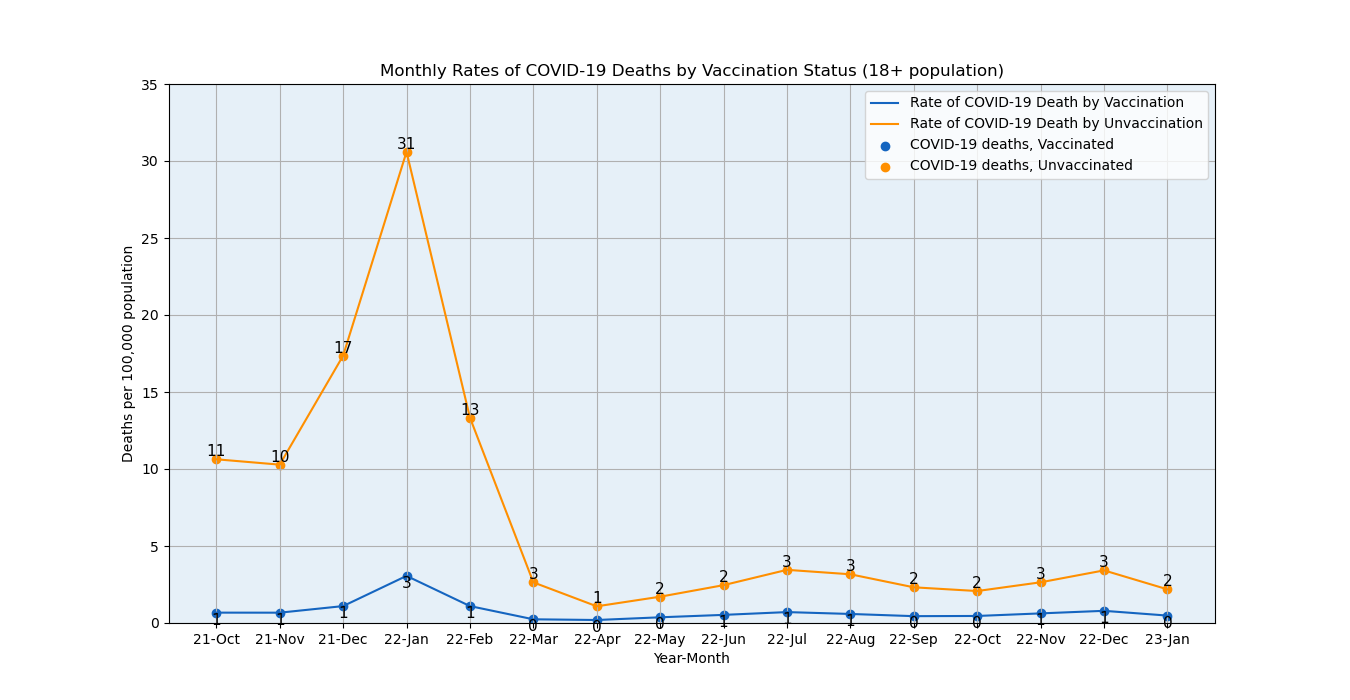

In [11]:
# Create the line chart
ax = covid_death.plot(x='month', y="Monthly vaccinated 18+ outcome(per 100,000 population)",
                    figsize=(13.5, 7), color='#1565C0', label='Rate of COVID-19 Death by Vaccination')
covid_death.plot(x='month', y="Monthly unvaccinated 18+ outcome(per 100,000 population)",
               figsize=(13.5, 7), color='#FF8F00', label='Rate of COVID-19 Death by Unvaccination', ax=ax)


# Add dots to the lines
ax.scatter(covid_death['month'], covid_death["Monthly vaccinated 18+ outcome(per 100,000 population)"], color='#1565C0', label='COVID-19 deaths, Vaccinated')
ax.scatter(covid_death['month'], covid_death["Monthly unvaccinated 18+ outcome(per 100,000 population)"], color='#FF8F00', label='COVID-19 deaths, Unvaccinated')

# Set labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Deaths per 100,000 population')
ax.set_title('Monthly Rates of COVID-19 Deaths by Vaccination Status (18+ population)')

# Set the maximum y-axis value
ax.set_ylim(0, 35)
ax.set_xticks(covid_death['month'])
ax.set_xticklabels(covid_death['month'])

# Annotate the data points
vaccinated_outcomes = covid_death["Monthly vaccinated 18+ outcome(per 100,000 population)"]
unvaccinated_outcomes = covid_death["Monthly unvaccinated 18+ outcome(per 100,000 population)"]
for idx in covid_death.index:
    month = covid_death.loc[idx, 'month']
    ax.annotate(f'{vaccinated_outcomes[idx]:.0f}', (month, vaccinated_outcomes[idx]), ha='center', va='top', fontsize=11, color='black')
    ax.annotate(f'{unvaccinated_outcomes[idx]:.0f}', (month, unvaccinated_outcomes[idx]), ha='center', va='bottom', fontsize=11, color='black')

# Add a legend
ax.legend()
plt.grid(True)
# Change the background color
ax.set_facecolor('#E6F0F8')

# Save the image before displaying it
plt.savefig('rates_of_covid19_death_by_vaccination_status.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


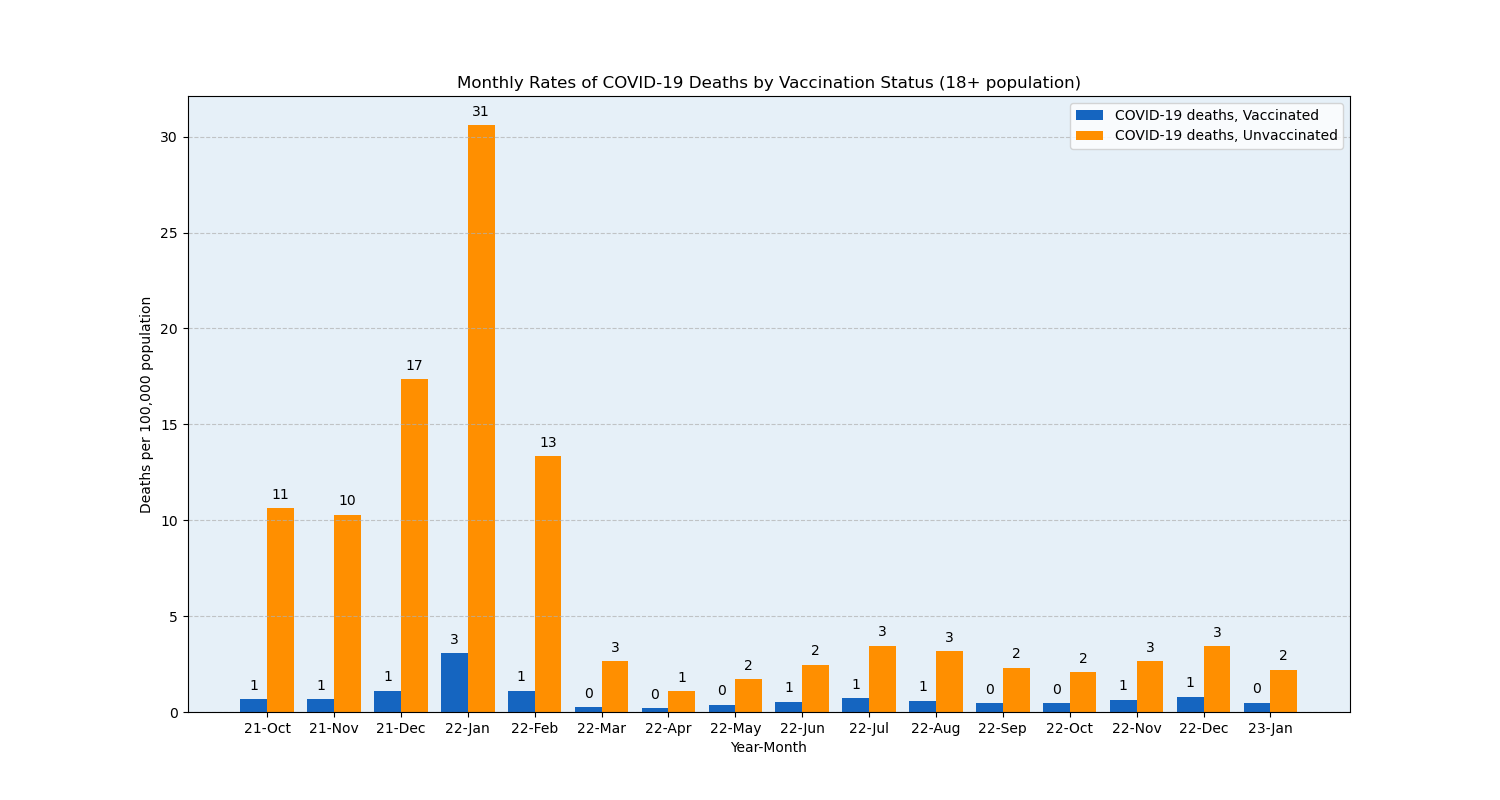

In [12]:
# Create the bar chart
plt.figure(figsize=(15, 8))
width = 0.4
x = np.arange(len(covid_death['month']))
plt.bar(x - width/2, covid_death['Monthly vaccinated 18+ outcome(per 100,000 population)'], width, label='COVID-19 deaths, Vaccinated', color='#1565C0')
plt.bar(x + width/2, covid_death['Monthly unvaccinated 18+ outcome(per 100,000 population)'], width, label='COVID-19 deaths, Unvaccinated', color='#FF8F00')

# Customize the chart
plt.xlabel('Year-Month')
plt.ylabel('Deaths per 100,000 population')
plt.title('Monthly Rates of COVID-19 Deaths by Vaccination Status (18+ population)')
plt.xticks(x, covid_death['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i, v in enumerate(covid_death['Monthly vaccinated 18+ outcome(per 100,000 population)']):
    plt.text(i - width/2, v + 0.5, f'{v:.0f}', ha='center', fontsize=10, color='black')

for i, v in enumerate(covid_death['Monthly unvaccinated 18+ outcome(per 100,000 population)']):
    plt.text(i + width/2, v + 0.5, f'{v:.0f}', ha='center', fontsize=10, color='black')

# Add a legend
plt.legend()

# Set the background color
plt.gca().set_facecolor('#E6F0F8')

# Save the image before displaying it
plt.savefig('deaths_bar_chart.png', bbox_inches='tight', dpi=300)

# Display the chart
plt.show()
